In [35]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [38]:
folder = r"C:\Users\YaelSuarez\OneDrive - Karolinska Institutet\Documents\KI\Experiments\Rheology"

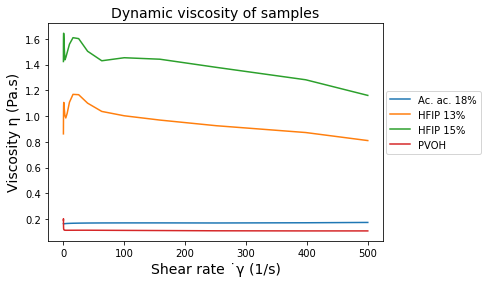

In [61]:
vis_3 = {}
shear_rate_3 = {}
vis_av = {}
for f in sorted(os.listdir(folder)):
    path = os.path.join(folder, f)
    for fn in sorted(os.listdir(path)):
        df_raw = pd.read_excel(os.path.join(path, fn), sheet_name="Flow sweep - 1", skiprows=2, engine='openpyxl')
        viscosity = []
        shear_rate = []
        for i,j in zip(df_raw["Pa.s"],df_raw["1/s"]) :
            viscosity.append(i)
            shear_rate.append(j)
            vis_3[fn] = viscosity
            shear_rate_3[fn] = shear_rate
df_vis = pd.DataFrame(vis_3)
df_shra = pd.DataFrame(shear_rate_3)

df_vis_av = df_vis.groupby(lambda name:name.split("_")[0], axis=1).mean()
df_shra_av = df_shra.groupby(lambda name:name.split("_")[0], axis=1).mean()

columns = list(df_shra_av.columns)
names = []

for c in columns:
    plt.plot(df_shra_av[c],df_vis_av[c])
    names.append(c)

plt.ylabel('Viscosity η (Pa.s)', fontsize=14)
plt.xlabel('Shear rate ˙γ (1/s)', fontsize=14)
plt.title('Dynamic viscosity of samples', fontsize=14)
plt.legend(names, loc=(1.01,0.4))

In [ ]:
te amo